# Agrupar por fecha

In [121]:
import pandas as pd

# Creamos el dataframe
df = pd.DataFrame({
    'fecha': ['2023-01-01 00:10:15', '2023-01-03 11:11:03', '2023-01-06 00:23:44',
              '2023-01-07 13:10:25', '2023-01-07 13:12:35', '2023-01-09 00:10:15'],
    'valor': [100, 200, 400, 600, 150, 170]
})

# Convertimos la columna de fecha a un objeto datetime de pandas
df['fecha'] = pd.to_datetime(df['fecha'])
df

,fecha,valor
0,2023-01-01 00:10:15,100
1,2023-01-03 11:11:03,200
2,2023-01-06 00:23:44,400
3,2023-01-07 13:10:25,600
4,2023-01-07 13:12:35,150
5,2023-01-09 00:10:15,170


In [122]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [123]:
# Agrupamos los datos por día y sumamos los valores de cada grupo
subtotales = df.groupby(df['fecha'].dt.date)['valor'].sum()

subtotales

fecha
2023-01-01    100
2023-01-03    200
2023-01-06    400
2023-01-07    750
2023-01-09    170
Name: valor, dtype: int64

¿Cómo generar un df con los subtotales por fecha y que las fechas intermedias con subtotales nulos aparezcan en el dataframe con valor 0?

- Crear un rango de fechas que incluya todas las fechas en el DataFrame original.

- Fusionar el DataFrame original con el rango de fechas utilizando un left join para mantener todas las fechas del rango.

- Agrupar los datos por fecha y calcular los subtotales.

- Llenar los valores nulos de los subtotales con 0.

In [124]:
# Reducimos la fechahora a sólo fecha
df['fecha'] = df['fecha'].dt.date

df

,fecha,valor
0,2023-01-01,100
1,2023-01-03,200
2,2023-01-06,400
3,2023-01-07,600
4,2023-01-07,150
5,2023-01-09,170


In [125]:
df.dtypes

fecha    object
valor     int64
dtype: object

In [126]:
# Convertimos de nuevo la columna de fecha a un objeto datetime de pandas
df['fecha'] = pd.to_datetime(df['fecha'])

In [127]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [128]:
# Creamos un rango de fechas que incluya todas las fechas en el DataFrame original
fechas = pd.date_range(start=df['fecha'].min(), end=df['fecha'].max())

fechas

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09'],
              dtype='datetime64[ns]', freq='D')

In [129]:
# Creamos un DataFrame con las fechas del rango
df_fechas = pd.DataFrame({'fecha': fechas})

df_fechas

,fecha
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
5,2023-01-06
6,2023-01-07
7,2023-01-08
8,2023-01-09


In [130]:
df_fechas.dtypes

fecha    datetime64[ns]
dtype: object

In [131]:
df.dtypes

fecha    datetime64[ns]
valor             int64
dtype: object

In [132]:
# Fusionamos el DataFrame original con el rango de fechas utilizando un left join
df_merged = pd.merge(df_fechas, df, on='fecha', how='left')

df_merged

,fecha,valor
0,2023-01-01,100.0
1,2023-01-02,NaN
2,2023-01-03,200.0
3,2023-01-04,NaN
4,2023-01-05,NaN
5,2023-01-06,400.0
6,2023-01-07,600.0
7,2023-01-07,150.0
8,2023-01-08,NaN
9,2023-01-09,170.0


In [133]:
# Agrupamos los datos por fecha y calculamos los subtotales
subtotales = df_merged.groupby('fecha')['valor'].sum()

# Llenamos los valores nulos de los subtotales con 0
subtotales = subtotales.fillna(0)

# Creamos un DataFrame con los subtotales por fecha
df_subtotales = pd.DataFrame({'fecha': subtotales.index, 'subtotales': subtotales.values})

# Imprimimos el DataFrame con los subtotales por fecha y las fechas intermedias con subtotales nulos
df_subtotales

,fecha,subtotales
0,2023-01-01,100.0
1,2023-01-02,0.0
2,2023-01-03,200.0
3,2023-01-04,0.0
4,2023-01-05,0.0
5,2023-01-06,400.0
6,2023-01-07,750.0
7,2023-01-08,0.0
8,2023-01-09,170.0


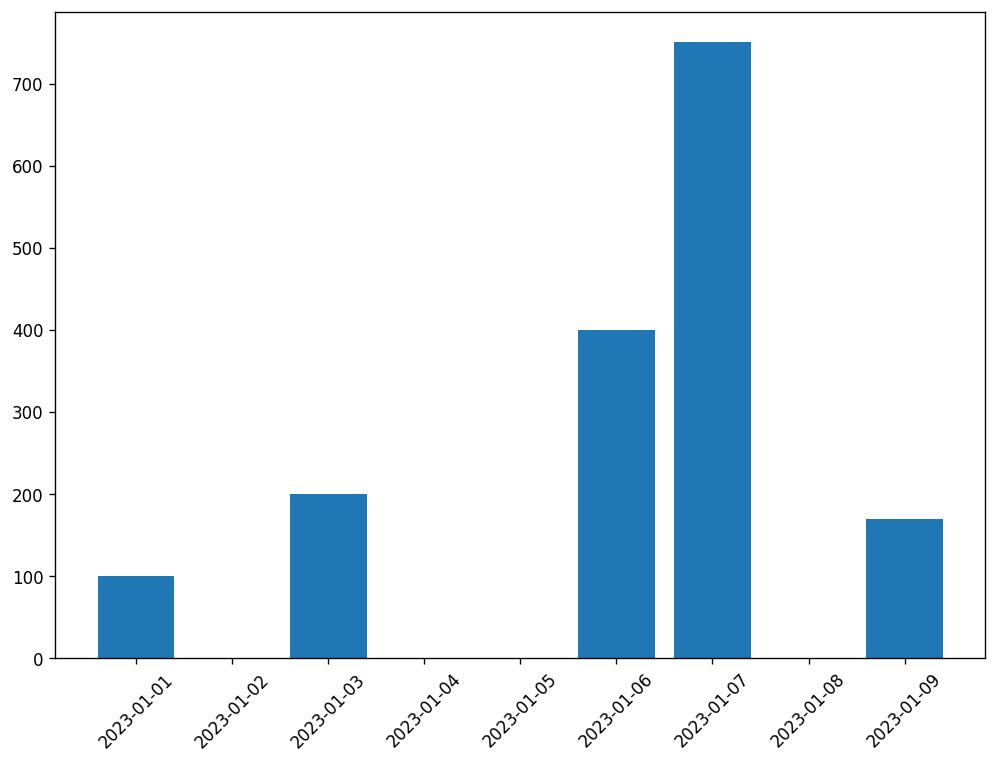

In [137]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

plt.bar(df_subtotales["fecha"], df_subtotales["subtotales"])
plt.xticks(rotation=45)
plt.show()